# Dados sobre COVID-19 por Estado Brasileiro

## Fonte de Dados

Boletins informativos e casos do coronavírus por município por dia.

https://brasil.io/dataset/covid19/caso

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Importando dados do site
#data = pd.read_csv('https://brasil.io/dataset/covid19/caso?format=csv')

# substituted previous command because it was not allowing access, it worked for a while
import requests
import io

response = requests.get('https://brasil.io/dataset/covid19/caso?format=csv')

file_object = io.StringIO(response.content.decode('utf-8'))
data = pd.read_csv(file_object)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230975 entries, 0 to 230974
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            230975 non-null  object 
 1   state                           230975 non-null  object 
 2   city                            228371 non-null  object 
 3   place_type                      230975 non-null  object 
 4   confirmed                       230975 non-null  int64  
 5   deaths                          230975 non-null  int64  
 6   is_last                         230975 non-null  bool   
 7   estimated_population_2019       229592 non-null  float64
 8   city_ibge_code                  229592 non-null  float64
 9   confirmed_per_100k_inhabitants  224104 non-null  float64
 10  death_rate                      230975 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(4)
memory usage: 17.8+ MB


In [4]:
data.head(n = 15)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-06-19,AC,Acrelândia,city,181,2,True,15256.0,1200013.0,1186.41846,0.0110
1,2020-06-19,AC,Assis Brasil,city,131,5,True,7417.0,1200054.0,1766.21275,0.0382
2,2020-06-19,AC,Brasiléia,city,236,6,True,26278.0,1200104.0,898.08966,0.0254
3,2020-06-19,AC,Bujari,city,124,1,True,10266.0,1200138.0,1207.87064,0.0081
4,2020-06-19,AC,Capixaba,city,110,3,True,11733.0,1200179.0,937.52663,0.0273
5,2020-06-19,AC,Cruzeiro do Sul,city,1837,28,True,88376.0,1200203.0,2078.61863,0.0152
6,2020-06-19,AC,Epitaciolândia,city,133,6,True,18411.0,1200252.0,722.39422,0.0451
7,2020-06-19,AC,Feijó,city,127,4,True,34780.0,1200302.0,365.15239,0.0315
8,2020-06-19,AC,Jordão,city,27,0,True,8317.0,1200328.0,324.63629,0.0000
9,2020-06-19,AC,Mâncio Lima,city,105,1,True,18977.0,1200336.0,553.30136,0.0095


In [5]:
data.describe()

,confirmed,deaths,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
count,230975.000000,230975.000000,2.295920e+05,2.295920e+05,224104.000000,230975.000000
mean,205.033402,11.508635,1.610379e+05,3.121439e+06,136.011838,0.059570
std,2595.919221,177.772988,1.381116e+06,1.027474e+06,309.099486,0.160659
min,0.000000,0.000000,8.370000e+02,1.100000e+01,0.002180,0.000000
25%,2.000000,0.000000,9.148000e+03,2.408003e+06,13.085580,0.000000
50%,6.000000,0.000000,1.971600e+04,3.133303e+06,38.611905,0.000000
75%,30.000000,1.000000,4.521900e+04,4.103503e+06,124.378110,0.046500
max,211658.000000,12232.000000,4.591905e+07,5.300108e+06,14148.174240,1.000000




---



## Manipulação dos Dados

In [6]:
# Dados por estado
data_states = data[data.place_type.eq('state')]
data_states.head(n = 15)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
22,2020-06-19,AC,NaN,state,10987,292,True,881935.0,12.0,1245.78342,0.0266
126,2020-06-19,AL,NaN,state,26906,848,True,3337357.0,27.0,806.20683,0.0315
187,2020-06-19,AM,NaN,state,61683,2624,True,4144597.0,13.0,1488.27498,0.0425
204,2020-06-19,AP,NaN,state,19922,348,True,845731.0,16.0,2355.59534,0.0175
580,2020-06-19,BA,NaN,state,43922,1305,True,14873064.0,29.0,295.31238,0.0297
766,2020-06-19,CE,NaN,state,90441,5497,True,9132078.0,23.0,990.36605,0.0608
769,2020-06-19,DF,NaN,state,30902,397,True,3015268.0,53.0,1024.85086,0.0128
849,2020-06-19,ES,NaN,state,33232,1267,True,4018650.0,32.0,826.94437,0.0381
1049,2020-06-19,GO,NaN,state,14540,289,True,7018354.0,52.0,207.17108,0.0199
1265,2020-06-19,MA,NaN,state,68500,1645,True,7075181.0,21.0,968.17311,0.0240


In [7]:
# Segregar dados de casos confirmados e mortes
data_states_confirmed = data_states[['date','state','confirmed']]
data_states_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2604 entries, 22 to 230974
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       2604 non-null   object
 1   state      2604 non-null   object
 2   confirmed  2604 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 81.4+ KB


In [8]:
data_states_deaths = data_states[['date','state','deaths']]
data_states_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2604 entries, 22 to 230974
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2604 non-null   object
 1   state   2604 non-null   object
 2   deaths  2604 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 81.4+ KB


In [9]:
# Tabela de população de cada estado em 2019

states_pop = data_states[['state','estimated_population_2019']]
states_pop = states_pop.drop_duplicates()
states_pop.set_index('state', inplace = True)
states_pop

,estimated_population_2019
state,
AC,881935.0
AL,3337357.0
AM,4144597.0
AP,845731.0
BA,14873064.0
CE,9132078.0
DF,3015268.0
ES,4018650.0
GO,7018354.0


## Numero de Mortes

### Transformação de dados

In [10]:
# Transformar dataframe de long para wide
data_deaths = data_states_deaths.pivot(index='state', columns='date', values='deaths')
data_deaths.head()

date,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,...,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,51.0,52.0,55.0,57.0,59.0,62.0,67.0,73.0,75.0,78.0,80.0,87.0,92.0,97.0,105.0,113.0,122.0,135.0,142.0,148.0,161.0,165.0,171.0,181.0,190.0,201.0,207.0,211.0,223.0,237.0,245.0,254.0,256.0,259.0,265.0,271.0,281.0,287.0,292.0
AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,...,138.0,150.0,164.0,177.0,187.0,199.0,210.0,221.0,234.0,251.0,262.0,280.0,301.0,316.0,337.0,352.0,368.0,385.0,406.0,424.0,443.0,461.0,482.0,506.0,531.0,557.0,601.0,622.0,NaN,640.0,660.0,681.0,701.0,723.0,744.0,768.0,793.0,811.0,831.0,848.0
AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,7.0,12.0,...,1035.0,1098.0,1160.0,1235.0,1331.0,1375.0,1413.0,1433.0,1491.0,1561.0,1620.0,1669.0,1744.0,1758.0,1781.0,1852.0,1891.0,1964.0,2011.0,2047.0,2052.0,2071.0,2102.0,2138.0,2158.0,2199.0,2232.0,2250.0,2271.0,2315.0,2363.0,2400.0,2429.0,2465.0,2492.0,2512.0,2550.0,2579.0,2605.0,2624.0
AP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,73.0,86.0,94.0,101.0,103.0,108.0,119.0,127.0,136.0,142.0,151.0,157.0,NaN,163.0,168.0,173.0,183.0,198.0,207.0,215.0,222.0,228.0,237.0,247.0,254.0,260.0,269.0,272.0,278.0,285.0,289.0,303.0,312.0,319.0,324.0,329.0,337.0,338.0,342.0,348.0
BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,3.0,6.0,7.0,...,214.0,225.0,236.0,262.0,281.0,286.0,295.0,312.0,326.0,362.0,376.0,399.0,413.0,460.0,477.0,495.0,531.0,570.0,609.0,638.0,667.0,701.0,736.0,762.0,790.0,819.0,846.0,879.0,910.0,937.0,975.0,1013.0,1039.0,1069.0,1105.0,1145.0,1181.0,1222.0,1263.0,1305.0


In [11]:
# Verificar index das observação
data_deaths.index

Index(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],
      dtype='object', name='state')

In [12]:
# Está indexado por estado mas para criação da visualização é melhor que esteja indexado por data
data_deaths = data_deaths.transpose()
data_deaths

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-15,265.0,768.0,2512.0,329.0,1145.0,5041.0,319.0,1087.0,238.0,1499.0,481.0,36.0,223.0,4291.0,656.0,3886.0,393.0,342.0,7728.0,585.0,332.0,216.0,360.0,199.0,352.0,10767.0,140.0
2020-06-16,271.0,793.0,2550.0,337.0,1181.0,5192.0,348.0,1132.0,249.0,1537.0,502.0,36.0,250.0,4350.0,671.0,3959.0,398.0,372.0,7967.0,626.0,346.0,224.0,374.0,212.0,364.0,11132.0,149.0
2020-06-17,281.0,811.0,2579.0,338.0,1222.0,5307.0,365.0,1179.0,255.0,1570.0,537.0,39.0,272.0,4395.0,696.0,4009.0,421.0,394.0,8138.0,655.0,361.0,231.0,387.0,216.0,383.0,11521.0,152.0


In [13]:
# Verificar se a indexação está como data
data_deaths.index

Index(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       ...
       '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14',
       '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19'],
      dtype='object', name='date', length=116)

In [14]:
# Conversão do index para DateTimeIndex pois está como 'object'
datetime_index = pd.DatetimeIndex(data_deaths.index)
data_deaths.set_index(datetime_index, inplace = True)
# Verificar o index novamente
data_deaths.index

DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05',
               ...
               '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-13',
               '2020-06-14', '2020-06-15', '2020-06-16', '2020-06-17',
               '2020-06-18', '2020-06-19'],
              dtype='datetime64[ns]', name='date', length=116, freq=None)

In [15]:
# Existem NAs entre observações válidas, provavlemente houve um falta de informação para aquele estado naquele dia. Vamos considerar este valor igual ao último valor válido para aquele estado.
data_deaths.fillna(method='ffill', inplace=True)
data_deaths

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-15,265.0,768.0,2512.0,329.0,1145.0,5041.0,319.0,1087.0,238.0,1499.0,481.0,36.0,223.0,4291.0,656.0,3886.0,393.0,342.0,7728.0,585.0,332.0,216.0,360.0,199.0,352.0,10767.0,140.0
2020-06-16,271.0,793.0,2550.0,337.0,1181.0,5192.0,348.0,1132.0,249.0,1537.0,502.0,36.0,250.0,4350.0,671.0,3959.0,398.0,372.0,7967.0,626.0,346.0,224.0,374.0,212.0,364.0,11132.0,149.0
2020-06-17,281.0,811.0,2579.0,338.0,1222.0,5307.0,365.0,1179.0,255.0,1570.0,537.0,39.0,272.0,4395.0,696.0,4009.0,421.0,394.0,8138.0,655.0,361.0,231.0,387.0,216.0,383.0,11521.0,152.0


In [16]:
# Apesar dos dados serem desde fevereiro de 2020, a primeira morte ocorreu somente em 17/03/2020, portanto estas primeiras observações serão removidas
data_deaths = data_deaths.loc['2020-03-16':data_deaths.index[len(data_deaths.index)-3]]
data_deaths

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-16,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
2020-03-17,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN
2020-03-18,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,3.0,0.0
2020-03-19,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,NaN,0.0,0.0,0.0,5.0,0.0
2020-03-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,0.0,0.0,0.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-13,256.0,723.0,2465.0,319.0,1069.0,4829.0,293.0,1028.0,211.0,1436.0,454.0,31.0,199.0,4191.0,623.0,3784.0,360.0,320.0,7592.0,534.0,309.0,200.0,344.0,193.0,316.0,10581.0,132.0
2020-06-14,259.0,744.0,2492.0,324.0,1105.0,4885.0,304.0,1055.0,216.0,1467.0,475.0,33.0,213.0,4201.0,633.0,3855.0,374.0,334.0,7672.0,553.0,324.0,203.0,350.0,195.0,330.0,10694.0,136.0
2020-06-15,265.0,768.0,2512.0,329.0,1145.0,5041.0,319.0,1087.0,238.0,1499.0,481.0,36.0,223.0,4291.0,656.0,3886.0,393.0,342.0,7728.0,585.0,332.0,216.0,360.0,199.0,352.0,10767.0,140.0


### Visualização de Dados

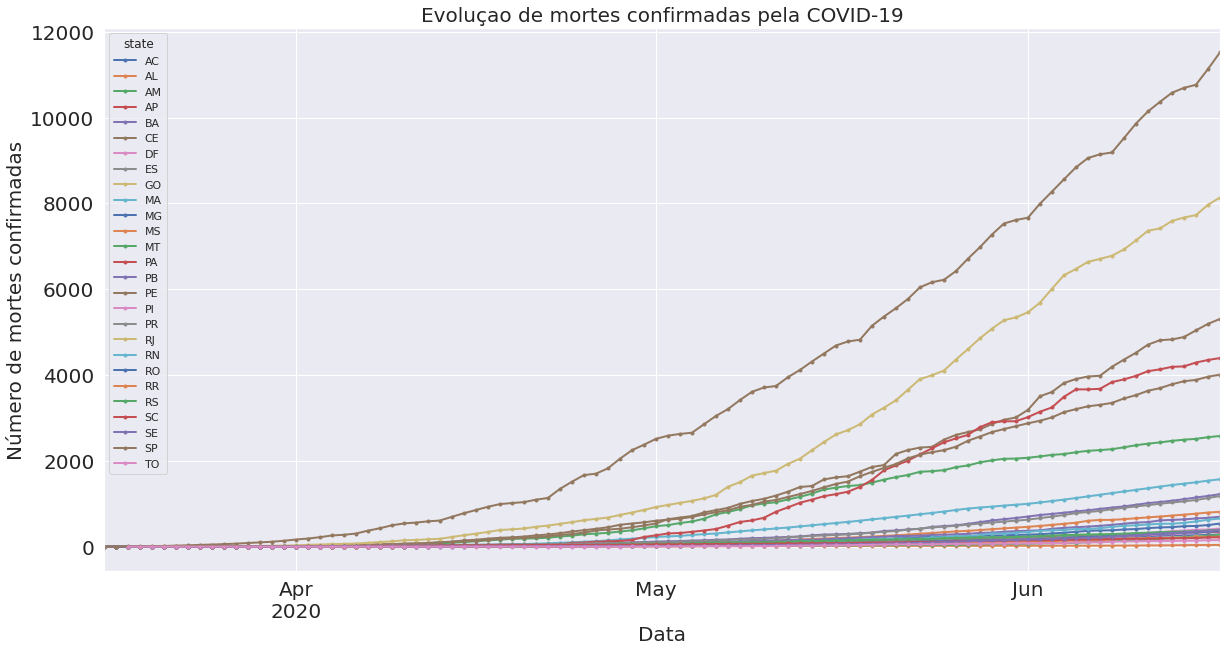

In [17]:
# Visualizar número totais de mortes por estado
data_deaths.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
plt.xlabel('Data', fontsize=20);
plt.ylabel('Número de mortes confirmadas', fontsize=20);
plt.title('Evoluçao de mortes confirmadas pela COVID-19', fontsize=20);

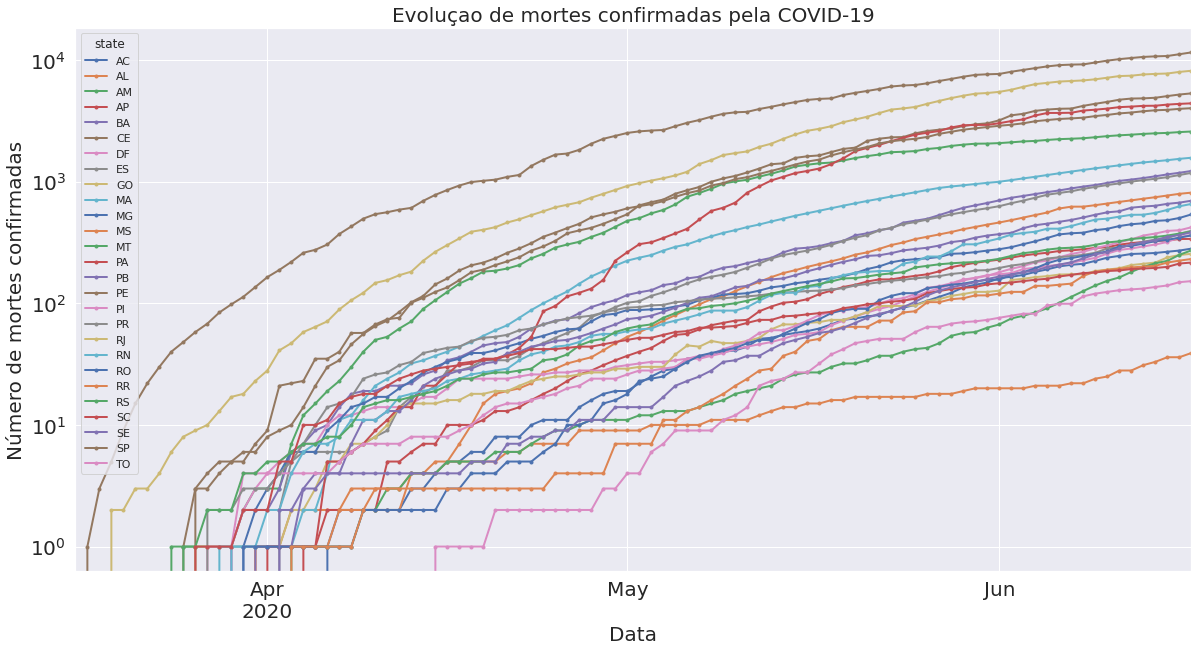

In [18]:
# Visualizar número totais de mortes por estado na escala semi-logarítmica
data_deaths.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy = True)
plt.xlabel('Data', fontsize=20);
plt.ylabel('Número de mortes confirmadas', fontsize=20);
plt.title('Evoluçao de mortes confirmadas pela COVID-19', fontsize=20);

### Visualização de dados alinhando o primeiro dia com 5 mortes

In [19]:
# Iterar sobre as colunas e valores < 5 serão nulos
for col in data_deaths.columns:
    data_deaths.loc[(data_deaths[col] < 5), col] = None

# Check out tail
data_deaths.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-13,256.0,723.0,2465.0,319.0,1069.0,4829.0,293.0,1028.0,211.0,1436.0,454.0,31.0,199.0,4191.0,623.0,3784.0,360.0,320.0,7592.0,534.0,309.0,200.0,344.0,193.0,316.0,10581.0,132.0
2020-06-14,259.0,744.0,2492.0,324.0,1105.0,4885.0,304.0,1055.0,216.0,1467.0,475.0,33.0,213.0,4201.0,633.0,3855.0,374.0,334.0,7672.0,553.0,324.0,203.0,350.0,195.0,330.0,10694.0,136.0
2020-06-15,265.0,768.0,2512.0,329.0,1145.0,5041.0,319.0,1087.0,238.0,1499.0,481.0,36.0,223.0,4291.0,656.0,3886.0,393.0,342.0,7728.0,585.0,332.0,216.0,360.0,199.0,352.0,10767.0,140.0
2020-06-16,271.0,793.0,2550.0,337.0,1181.0,5192.0,348.0,1132.0,249.0,1537.0,502.0,36.0,250.0,4350.0,671.0,3959.0,398.0,372.0,7967.0,626.0,346.0,224.0,374.0,212.0,364.0,11132.0,149.0
2020-06-17,281.0,811.0,2579.0,338.0,1222.0,5307.0,365.0,1179.0,255.0,1570.0,537.0,39.0,272.0,4395.0,696.0,4009.0,421.0,394.0,8138.0,655.0,361.0,231.0,387.0,216.0,383.0,11521.0,152.0


In [20]:
# Retirar colunas que tenham tudo NaNs (estados que não chegaram a 5 mortes)
data_deaths.dropna(axis = 1, how = "all", inplace = True)
data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2020-03-16 to 2020-06-17
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      63 non-null     float64
 1   AL      64 non-null     float64
 2   AM      76 non-null     float64
 3   AP      68 non-null     float64
 4   BA      76 non-null     float64
 5   CE      81 non-null     float64
 6   DF      77 non-null     float64
 7   ES      76 non-null     float64
 8   GO      73 non-null     float64
 9   MA      72 non-null     float64
 10  MG      76 non-null     float64
 11  MS      63 non-null     float64
 12  MT      63 non-null     float64
 13  PA      73 non-null     float64
 14  PB      71 non-null     float64
 15  PE      82 non-null     float64
 16  PI      72 non-null     float64
 17  PR      76 non-null     float64
 18  RJ      86 non-null     float64
 19  RN      75 non-null     float64
 20  RO      58 non-null     float64
 21  RR      49 non-null  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
# Criar dataframe com a data do primeiro dia com a 5a morte em cada estado
date_5th_death = data_deaths.apply(pd.Series.first_valid_index)
df_5th_death = pd.DataFrame(date_5th_death)
df_5th_death

,0
state,
AC,2020-04-16
AL,2020-04-15
AM,2020-04-03
AP,2020-04-11
BA,2020-04-03
CE,2020-03-29
DF,2020-04-02
ES,2020-04-03
GO,2020-04-06


In [22]:
# Resetar o index, retirar a coluna de data
data_deaths_drop = data_deaths.reset_index().drop(['date'], axis = 1)
data_deaths_drop.head()

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN


In [23]:
# Trazer para cima os dados a partir do primeiro dado válido (shift)
for col in data_deaths_drop.columns:
    data_deaths_drop[col] = data_deaths_drop[col].shift(-data_deaths_drop[col].first_valid_index())
# check out head
data_deaths_drop

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,5.0,5.0,7.0,5.0,6.0,5.0,5.0,5.0,5.0,11.0,6.0,5.0,5.0,5.0,7.0,5.0,5.0,5.0,6.0,6.0,5.0,7.0,5.0,5.0,5.0,5.0,6.0
1,5.0,5.0,12.0,5.0,7.0,5.0,6.0,6.0,5.0,12.0,6.0,5.0,5.0,5.0,11.0,5.0,6.0,7.0,8.0,7.0,5.0,7.0,5.0,5.0,5.0,9.0,7.0
2,6.0,7.0,15.0,6.0,9.0,7.0,7.0,6.0,7.0,16.0,6.0,5.0,5.0,6.0,11.0,6.0,7.0,10.0,9.0,7.0,5.0,7.0,6.0,10.0,5.0,15.0,9.0
3,6.0,10.0,19.0,7.0,10.0,9.0,7.0,6.0,7.0,21.0,9.0,5.0,5.0,7.0,13.0,6.0,7.0,14.0,10.0,8.0,6.0,7.0,7.0,10.0,7.0,22.0,9.0
4,8.0,15.0,23.0,7.0,14.0,21.0,10.0,6.0,8.0,24.0,11.0,5.0,6.0,9.0,13.0,8.0,7.0,15.0,13.0,11.0,7.0,11.0,7.0,11.0,7.0,30.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11132.0,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11521.0,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


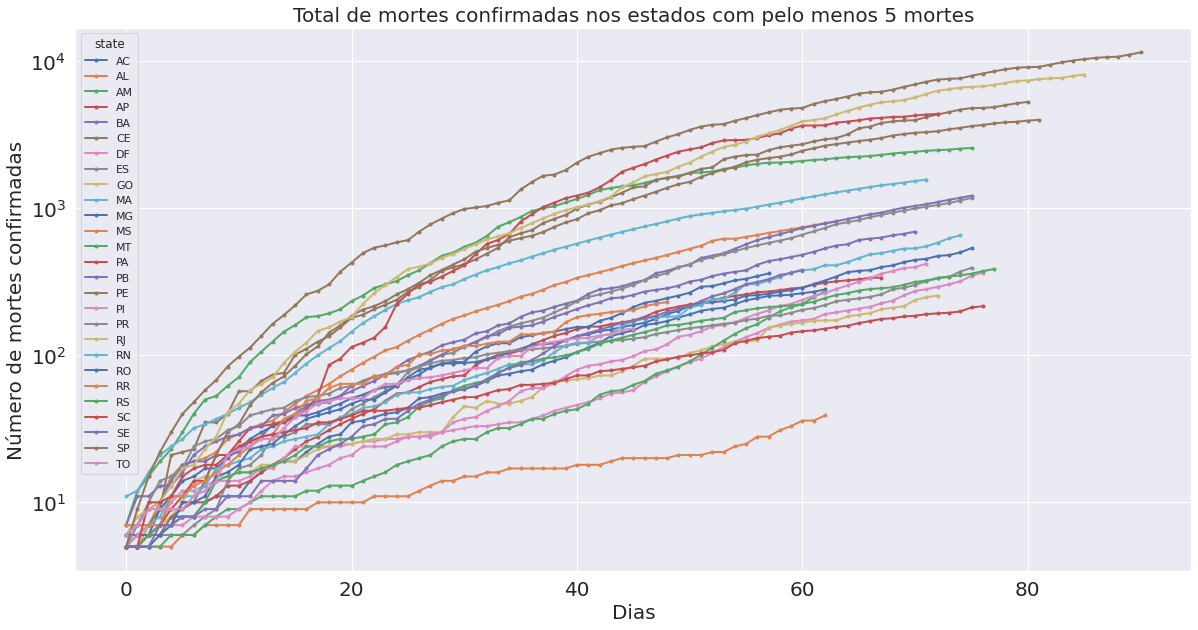

In [24]:
# Evolução na escala semi-logarítimica 
data_deaths_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy = True)
plt.xlabel('Dias', fontsize=20);
plt.ylabel('Número de mortes confirmadas', fontsize=20);
plt.title('Total de mortes confirmadas nos estados com pelo menos 5 mortes', fontsize=20);

### Visualização interativa com altair

In [25]:
# Transformar dados em long para utilizar no altair
deaths_long = data_deaths_drop.reset_index().melt(id_vars = 'index', value_name = 'Deaths').rename(columns={'index':'Day'})
deaths_long

,Day,state,Deaths
0,0,AC,5.0
1,1,AC,5.0
2,2,AC,6.0
3,3,AC,6.0
4,4,AC,8.0
...,...,...,...
2533,89,TO,NaN
2534,90,TO,NaN
2535,91,TO,NaN
2536,92,TO,NaN


In [26]:
# Adicionar primeiro dia da 5a morte por estado
deaths_long = deaths_long.merge(df_5th_death, left_on='state', right_index=True, how='left')
deaths_long

,Day,state,Deaths,0
0,0,AC,5.0,2020-04-16
1,1,AC,5.0,2020-04-16
2,2,AC,6.0,2020-04-16
3,3,AC,6.0,2020-04-16
4,4,AC,8.0,2020-04-16
...,...,...,...,...
2533,89,TO,NaN,2020-05-03
2534,90,TO,NaN,2020-05-03
2535,91,TO,NaN,2020-05-03
2536,92,TO,NaN,2020-05-03


In [27]:
# Adicionar coluna com a data de cada observação
from datetime import datetime  
from datetime import timedelta 
deaths_long['Date'] = deaths_long.iloc[:,3] + deaths_long['Day'].map(timedelta)
deaths_long

,Day,state,Deaths,0,Date
0,0,AC,5.0,2020-04-16,2020-04-16
1,1,AC,5.0,2020-04-16,2020-04-17
2,2,AC,6.0,2020-04-16,2020-04-18
3,3,AC,6.0,2020-04-16,2020-04-19
4,4,AC,8.0,2020-04-16,2020-04-20
...,...,...,...,...,...
2533,89,TO,NaN,2020-05-03,2020-07-31
2534,90,TO,NaN,2020-05-03,2020-08-01
2535,91,TO,NaN,2020-05-03,2020-08-02
2536,92,TO,NaN,2020-05-03,2020-08-03


In [28]:
# Remover coluna com primeiro dia da 5a morte
deaths_long = deaths_long.drop([deaths_long.columns[3]] ,  axis='columns')
deaths_long

,Day,state,Deaths,Date
0,0,AC,5.0,2020-04-16
1,1,AC,5.0,2020-04-17
2,2,AC,6.0,2020-04-18
3,3,AC,6.0,2020-04-19
4,4,AC,8.0,2020-04-20
...,...,...,...,...
2533,89,TO,NaN,2020-07-31
2534,90,TO,NaN,2020-08-01
2535,91,TO,NaN,2020-08-02
2536,92,TO,NaN,2020-08-03


In [29]:
# Adicionar população por estado
deaths_long = deaths_long.merge(states_pop, left_on='state', right_index=True, how='left')
deaths_long.head()

,Day,state,Deaths,Date,estimated_population_2019
0,0,AC,5.0,2020-04-16,881935.0
1,1,AC,5.0,2020-04-17,881935.0
2,2,AC,6.0,2020-04-18,881935.0
3,3,AC,6.0,2020-04-19,881935.0
4,4,AC,8.0,2020-04-20,881935.0


In [30]:
# Adicionar taxa de mortes a cada 100.000 habitantes
deaths_long['DeathPop'] = deaths_long['Deaths']/deaths_long['estimated_population_2019']*100000
deaths_long.head()

,Day,state,Deaths,Date,estimated_population_2019,DeathPop
0,0,AC,5.0,2020-04-16,881935.0,0.566935
1,1,AC,5.0,2020-04-17,881935.0,0.566935
2,2,AC,6.0,2020-04-18,881935.0,0.680322
3,3,AC,6.0,2020-04-19,881935.0,0.680322
4,4,AC,8.0,2020-04-20,881935.0,0.907096


In [31]:
# drop NaNs
deaths_long = deaths_long.dropna()
deaths_long

,Day,state,Deaths,Date,estimated_population_2019,DeathPop
0,0,AC,5.0,2020-04-16,881935.0,0.566935
1,1,AC,5.0,2020-04-17,881935.0,0.566935
2,2,AC,6.0,2020-04-18,881935.0,0.680322
3,3,AC,6.0,2020-04-19,881935.0,0.680322
4,4,AC,8.0,2020-04-20,881935.0,0.907096
...,...,...,...,...,...,...
2485,41,TO,132.0,2020-06-13,1572866.0,8.392323
2486,42,TO,136.0,2020-06-14,1572866.0,8.646636
2487,43,TO,140.0,2020-06-15,1572866.0,8.900949
2488,44,TO,149.0,2020-06-16,1572866.0,9.473153


In [41]:
import altair as alt

# Selection tool
selection = alt.selection_single(fields=['state'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('state:N'),
                    alt.value('lightgray'))


# Base altair plot 
base = alt.Chart(deaths_long, title="Total de mortes confirmadas pelo COVID-19 por estado brasileiro").mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color=alt.Color('state', legend=None),
)

# Chart
chart = base.encode(
  color=alt.condition(selection, 'state:N', alt.value('lightgray')),
  tooltip=[alt.Tooltip('state:N', title = 'Estado'), alt.Tooltip('yearmonthdate(Date):N', title = 'Data', format = '%d/%m/%Y'), alt.Tooltip('Deaths:N', title = 'Mortes')]
).add_selection(
  selection
)

# Overlay
overlay = base.encode(
  color='state',
  opacity=alt.value(0.5),
).transform_filter(
  selection
)

# Text labels
text = base.mark_text(
    align='left',
    dx=5,
    size=15
).encode(
    x=alt.X('Day', aggregate='max',  axis=alt.Axis(title='Dias a partir da 5a morte no estado')),
    y=alt.Y('Deaths', aggregate={'argmax': 'Day'}, axis=alt.Axis(title='Mortes (escala logarítmica)')),
    text='state'
).transform_filter(
    selection
)

# Add doubling line

## Death doubles every 2 days
j = 0
for i in range(0,deaths_long.Day.max()):
    if 5*pow(2,(i/2)) < deaths_long.Deaths.max():
      j = i+2

source2 = alt.sequence(start=0, stop=j, step=1, as_='x')

double2 = alt.Chart(source2).mark_line(strokeDash=[2,2]).transform_calculate(
    double2='5*pow(2,(datum.x/2))'
).transform_fold(
    ['double2']
).encode(
    x='x:Q',
    y='value:Q',
    color=alt.value('lightgray')
)

text2 = alt.Chart({'values':[{'x': 13, 'y': 500}]}).mark_text(
    text='mortes duplicam a cada 2 dias', angle=285,
    size=13,
    color = 'gray'
).encode(
    x='x:Q', y='y:Q'
)

## Death doubles every 5 days
j = 0
for i in range(0,deaths_long.Day.max()):
    if 5*pow(2,(i/5)) < deaths_long.Deaths.max():
      j = i+2

source5 = alt.sequence(start=0, stop=j, step=1, as_='x')

double5 = alt.Chart(source5).mark_line(strokeDash=[2,2]).transform_calculate(
    double5='5*pow(2,(datum.x/5))'
).transform_fold(
    ['double5']
).encode(
    x='x:Q',
    y='value:Q',
    color=alt.value('lightgray')
)

text5 = alt.Chart({'values':[{'x': 49, 'y': 5000}]}).mark_text(
    text='a cada 5 dias', angle=308,
    size=13,
    color = 'gray'
).encode(
    x='x:Q', y='y:Q'
)

## Death doubles every 10 days
j = 0
for i in range(0,deaths_long.Day.max()):
    if 5*pow(2,(i/10)) < deaths_long.Deaths.max():
      j = i+2

source10 = alt.sequence(start=0, stop=j, step=1, as_='x')

double10 = alt.Chart(source10).mark_line(strokeDash=[2,2]).transform_calculate(
    double10='5*pow(2,(datum.x/10))'
).transform_fold(
    ['double10']
).encode(
    x='x:Q',
    y='value:Q',
    color=alt.value('lightgray')
)

text10 = alt.Chart({'values':[{'x': 85, 'y': 2000}]}).mark_text(
    text='a cada 10 dias', angle=330,
    size=13,
    color = 'gray'
).encode(
    x='x:Q', y='y:Q'
)

# Sum it all up
alt.layer(chart, overlay, text, double2, double5, double10, text2, text5, text10).configure_axis(
    labelFontSize=15,
    titleFontSize=20
).configure_title(
    fontSize=23
).properties(
    width=650,
    height=800
)


# Sum em up!
#chart + overlay + text

alt.LayerChart(...)

In [33]:
# Mortes por habitantes

# Base altair plot 
basepop = alt.Chart(deaths_long, title="Mortes confirmadas pelo COVID-19 a cada 100 mil habitantes").mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('DeathPop'),
    color=alt.Color('state', legend=None),
)

# Chart
chartpop = basepop.encode(
  color=alt.condition(selection, 'state:N', alt.value('lightgray')),
  tooltip=[alt.Tooltip('state:N', title = 'Estado'), alt.Tooltip('yearmonthdate(Date):N', title = 'Data', format = '%d/%m/%Y'), alt.Tooltip('DeathPop:N', title = 'Proporção de Mortes', format = '.2f')]
).add_selection(
  selection
)

# Overlay
overlaypop = basepop.encode(
  color='state',
  opacity=alt.value(0.5),
).transform_filter(
  selection
)

# Text labels
textpop = basepop.mark_text(
    align='left',
    dx=5,
    size=15
).encode(
    x=alt.X('Day', aggregate='max',  axis=alt.Axis(title='Dias a partir da 5a morte no estado')),
    y=alt.Y('DeathPop', aggregate={'argmax': 'Day'}, axis=alt.Axis(title='Mortes a cada 100 mil habitantes')),
    text='state'
).transform_filter(
    selection
)

# Sum em up!
alt.layer(chartpop + overlaypop + textpop).configure_axis(
    labelFontSize=15,
    titleFontSize=20
).configure_title(
    fontSize=23
).properties(
    width=650,
    height=800
)

alt.LayerChart(...)

In [50]:
import altair as alt

text2b = alt.Chart({'values':[{'x': 12, 'y': 500}]}).mark_text(
    text='mortes duplicam a cada 2 dias', angle=285,
    size=10,
    color = 'gray'
).encode(
    x='x:Q', y='y:Q'
)

text5b = alt.Chart({'values':[{'x': 52, 'y': 8000}]}).mark_text(
    text='a cada 5 dias', angle=308,
    size=10,
    color = 'gray'
).encode(
    x='x:Q', y='y:Q'
)

text10b = alt.Chart({'values':[{'x': 84, 'y': 2000}]}).mark_text(
    text='a cada 10 dias', angle=325,
    size=10,
    color = 'gray'
).encode(
    x='x:Q', y='y:Q'
)

# Sum it all up
chart1 = alt.layer(chart, overlay, text, double2, double5, double10, text2b, text5b, text10b).properties(
    width=350,
    height=500
)

# Sum em up!
chart2 = alt.layer(chartpop + overlaypop + textpop).properties(
    width=350,
    height=500
)

alt.hconcat(chart1, chart2
).configure_axis(
    labelFontSize=13,
    titleFontSize=13
).configure_title(
    fontSize=13
).add_selection(
  selection
)


alt.HConcatChart(...)

In [ ]:
double2 = alt.Chart(source2).mark_line().transform_calculate(
    double2='5*pow(2,(datum.x/2))'
).transform_fold(
    ['double2']
).encode(
    x='x:Q',
    y=alt.Y('value:Q', scale=alt.Scale(type='log')),
    color=alt.value('lightgray')
)

source5 = alt.sequence(start=0, stop=28, step=1, as_='x')

double5 = alt.Chart(source5).mark_line().transform_calculate(
    double5='5*pow(2,(datum.x/5))'
).transform_fold(
    ['double5']
).encode(
    x='x:Q',
    y='value:Q',
    color=alt.value('lightgray')
)

text2 = alt.Chart({'values':[{'x': 12, 'y': 400}]}).mark_text(
    text='doubles every 2 days', angle=314,
    color = 'gray'
).encode(
    x='x:Q', y='y:Q'
)

text5 = alt.Chart({'values':[{'x': 20, 'y': 100}]}).mark_text(
    text='doubles every 5 days', angle=339,
    color = 'gray'
).encode(
    x='x:Q', y='y:Q'
)

double2 + double5 + text2 + text5

alt.LayerChart(...)

# COVID-19 Exploratory Data Analysis (template)

## Context and introductory notes

## Exploratory data analysis and visualization using Python

### Imports and data

Let's import the necessary packages from the SciPy stack and get [the data](https://github.com/CSSEGISandData/COVID-19).

In [ ]:
# Data urls
base_url = 'https://raw.githubusercontent.com/hugobowne/COVID-19-EDA-tutorial/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_cases_data_url = base_url + 'time_series_covid19_confirmed_global.csv'
death_cases_data_url = base_url + 'time_series_covid19_deaths_global.csv'
recovery_cases_data_url = base_url+ 'time_series_covid19_recovered_global.csv'
# Import datasets as pandas dataframes
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_recovered = pd.read_csv(recovery_cases_data_url)

### Confirmed cases of COVID-19

We'll first check out the confirmed cases data by looking at the head of the dataframe:


In [ ]:
raw_data_confirmed.head(n=10)

**Discuss:** What do you see here?
We can also see a lot about the data by using the `.info()` and `.describe()` dataframe methods:

In [ ]:
raw_data_confirmed.info()

In [ ]:
raw_data_confirmed.describe()

**Discuss:** What do the above tell us?

### Number of confirmed cases by country

Look at the head (or tail) of our dataframe again and notice that each row is the data for a particular *province* or *state* of a given country:

In [ ]:
___

We want the numbers for each country, though. So the way to think about this is, for each country, we want to take all the rows (*regions/provinces*) that correspond to that country and add up the numbers for each. To put this in data-analytic-speak, we want to **group by** the country column and sum up all the values for the other columns.

This is a common pattern in data analysis that we humans have been using for centuries. Interestingly, it was only formalized in 2011 by Hadley Wickham in his seminal paper [The Split-Apply-Combine Strategy for Data
Analysis](https://www.jstatsoft.org/article/view/v040i01). The pattern we're discussing is now called Split-Apply-Combine and, in the case at hand, we

- Split the data into new datasets for each country,
- Apply the function of "sum" for each new dataset (that is, we add/sum up the values for each column) to sum over territories/provinces/states for each country, and
- Combine these datasets into a new dataframe.

The `pandas` API has the `groupby` method, which allows us to do this.

**Side note:** For more on split-apply-combine and `pandas` check out [my post here](https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby).

In [ ]:
# Group by region (also drop 'Lat', 'Long' as it doesn't make sense to sum them here)
confirmed_country = raw_data_confirmed.groupby(['Country/Region']).sum().drop(['Lat','Long'], axis = 1)
confirmed_country.head()

So each row of our new dataframe `confirmed_country` is a time series of the number of confirmed cases for each country. Cool! 
Now a dataframe has an associated object called an Index, which is essentially a set of unique indentifiers for each row. Let's check out the index of `confirmed_country`:

In [ ]:
confirmed_country.index

It's indexed by `Country/Region`. That's all good **but** if we index by date **instead**, it will allow us to produce some visualizations almost immediately. This is a nice aspect of the `pandas` API: you can make basic visualizations with it and, if your index consists of DateTimes, it knows that you're plotting time series and plays nicely with them.
To make the index the set of dates, notice that the column names are the dates. To turn column names into the index, we essentially want to make the columns the rows (and the rows the columns). This corresponds to taking the transpose of the dataframe:

In [ ]:
confirmed_country = confirmed_country.transpose()
confirmed_country.head()

Let's have a look at our index to see whether it actually consists of DateTimes:

In [ ]:
confirmed_country.index

Note that `dtype='object'`which means that these are strings, not DateTimes. We can use `pandas` to turn it into a DateTimeIndex:

In [ ]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(confirmed_country.index)
confirmed_country.set_index(datetime_index, inplace = True)
# Check out index
confirmed_country.index

Now we have a DateTimeIndex and Countries for columns, we can use the dataframe plotting method to visualize the time series of confirmed number of cases by country. As there are so many coutries, we'll plot a subset of them:

### Plotting confirmed cases by country

In [ ]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Brazil']
confirmed_country[poi].plot(figsize=(20,10), linewidth = 5, colormap = 'brg', fontsize = 20)

Let's label our axes and give the figure a title. We'll also thin the line and add points for the data so that the sampling is evident in our plots:

In [ ]:
# Plot time series of several countries of interest
confirmed_country[poi].plot(figsize=(20,10), linewidth = 2, marker = '2', colormap = 'brg', fontsize = 20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed cases count', fontsize=20);
plt.title('Reported Confirmed Cases Time Series', fontsize=20);

Let's do this again but make the y-axis logarithmic:

In [ ]:
# Plot time series of several countries of interest
confirmed_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy = True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed cases count', fontsize=20);
plt.title('Reported Confirmed Cases Time Series', fontsize=20);

**Discuss:** Why do we plot with a log y-axis? How do we interpret the log plot?
**Key points:** 
- If a variable takes on values over several orders of magnitude (e.g. in the 10s, 100s, and 1000s), we use a log axes so that the data is not all crammed into a small region of the visualization.
- If a curve is approximately linear on a log axis, then its approximately exponential growth and the gradient/slope of the line tells us about the exponent.


**ESSENTIAL POINT:** A logarithm scale is good for visualization **BUT** remember, in the thoughtful words of [Justin Bois](http://bois.caltech.edu/), "on the ground, in the hospitals, we live with the linear scale. The flattening of the US curve, for example is more evident on the log scale, but the growth is still rapid on a linear scale, which is what we feel."

**Summary:** We've 
- looked at the JHU data repository and imported the data,
- looked at the dataset containing the number of reported confirmed cases for each region,
- wrangled the data to look at the number of reported confirmed cases by country,
- plotted the number of reported confirmed cases by country (both log and semi-log),
- discussed why log plots are important for visualization and that we need to remember that we, as humans, families, communities, and society, experience COVID-19 linearly.

### Number of reported deaths

As we did above for `raw_data_confirmed`, let's check out the head and the info of the `raw_data_deaths` dataframe:

In [ ]:
raw_data_deaths.head()

In [ ]:
raw_data_deaths.info()

It seems to be structured similarly to `raw_data_confirmed`. I have checked it out in detail and can confirm that it is! This is good data design as it means that users like can explore, munge, and visualize it in a fashion analogous to the above. Can you remember what we did? We

- Split-Apply-Combined it (and dropped 'Lat'/'Long'),
- Transposed it,
- Made the index a DateTimeIndex, and
- Visualized it (linear and semi-log).

Let's now do the first three steps here for `raw_data_deaths` and see how we go:



### Number of reported deaths by country

In [ ]:
# Split-Apply-Combine
deaths_country = raw_data_deaths.groupby(['Country/Region']).sum().drop(['Lat','Long'], axis = 1)

# Transpose
deaths_country = deaths_country.transpose()

# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(deaths_country.index)
deaths_country.set_index(datetime_index, inplace = True)

# Check out head
deaths_country.head()

In [ ]:
# Check out the index
deaths_country.index

### Plotting number of reported deaths by country 

Let's now visualize the number of reported deaths:

In [ ]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Brazil']
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

Now on a semi-log plot:

In [ ]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Brazil']
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy = True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

### Aligning growth curves to start with day of number of known deaths ≥ 25

To compare what's happening in different countries, we can align each country's growth curves to all start on the day when the number of known deaths ≥ 25, such as reported in the first figure [here](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html).
To achieve this, first off, let's set set all values less than 25 to NaN so that the associated data points don't get plotted at all when we visualize the data:

In [ ]:
# Loop over columns & set values < 25 to None
for col in deaths_country.columns:
    deaths_country.loc[(deaths_country[col] < 25), col] = None

# Check out tail
deaths_country.tail()

Now let's plot as above to make sure we see what we think we should see:

In [ ]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Brazil']
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

The countries that have seen less than 25 total deaths will have columns of all NaNs now so let's drop these and then see how many columns we have left:

In [ ]:
# Drop columns that are all NaNs (i.e. countries that haven't yet reached 25 deaths)
deaths_country.dropna(axis = 1, how = "all", inplace = True)
deaths_country.info()

As we're going to align the countries from the day they first had at least 25 deaths, we won't need the DateTimeIndex. In fact, we won't need the date at all. So we can 
- Reset the Index, which will give us an ordinal index (which turns the date into a regular column) and
- Drop the date column (which will be called 'index) after the reset.

In [ ]:
# reset index, drop date column
deaths_country_drop = deaths_country.reset_index().drop(['index'], axis = 1)
deaths_country_drop.head()

Now it's time to shift each column so that the first entry is the first NaN value that it contains! To do this, we can use the `shift()` method on each column. How much do we shift each column, though? The magnitude of the shift is given by how many NaNs there are at the start of the column, which we can retrieve using the `first_valid_index()` method on the column **but** we want to shift **up**, which is negative in direction (by convention and perhaps intuition). SO let's do it.

In [ ]:
# shift
for col in deaths_country_drop.columns:
    deaths_country_drop[col] = deaths_country_drop[col].shift(-deaths_country_drop[col].first_valid_index())
# check out head
deaths_country_drop.head()

**Side note:** instead of looping over columns, we could have applied a lambda function to the columns of the dataframe, as follows:

In [ ]:
# shift using lambda function
#deaths_country = deaths_country.apply(lambda x: x.shift(-x.first_valid_index()))

Now we get to plot our time series, first with linear axes, then semi-log:

In [ ]:
# Plot time series 
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Brazil']
deaths_country_drop[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20);

In [ ]:
# Plot semi log time series 
deaths_country_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy = True)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20);

**Note:** although we have managed to plot what we wanted, the above plots are challenging to retrieve any meaningful information from. There are too many growth curves so that it's very crowded **and** too many colours look the same so it's difficult to tell which country is which from the legend. Below, we'll plot less curves and further down in the notebook we'll use the python package Altair to introduce interactivity into the plot in order to deal with this challenge.

In [ ]:
# Plot semi log time series 
ax = deaths_country_drop[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap = 'brg', fontsize=20, logy=True)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20);

**Summary:** We've 
- looked at the dataset containing the number of reported deaths for each region,
- wrangled the data to look at the number of reported deaths by country,
- plotted the number of reported deaths by country (both log and semi-log),
- aligned growth curves to start with day of number of known deaths ≥ 25.

### Plotting number of recovered people

The third dataset in the Hopkins repository is the number of recovered. We want to do similar data wrangling as in the two cases above so we *could* copy and paste our code again *but*, if you're writing the same code three times, it's likely time to write a function.

In [ ]:
# Function for grouping countries by region
def group_by_country(raw_data):
    """Returns data for countries indexed by date"""
    # Group by
    data = ___
    # Transpose
    data = ___
    # Set index as DateTimeIndex
    datetime_index = ___
    data.set_index(datetime_index, inplace=True)
    return data

In [ ]:
# Function to align growth curves
def align_curves(data, min_val):
    """Align growth curves  to start on the day when the number of known deaths = min_val"""
    # Loop over columns & set values < min_val to None
    for col in data.columns:
        ___
    # Drop columns with all NaNs
    ___
    # Reset index, drop date
    data = 
    # Shift each column to begin with first valid index
    for col in data.columns:
        data[col] = ___
    return data

In [ ]:
# Function to plot time series
def plot_time_series(df, plot_title, x_label, y_label, logy=False):
    """Plot time series and make looks a bit nice"""
    ax = df.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=logy)
    ax.legend(ncol=3, loc='lower right')
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);

For a sanity check, let's see these functions at work on the 'number of deaths' data:

In [ ]:
___
___
___

Now let's check use our functions to group, wrangle, and plot the recovered patients data:

In [ ]:
# group by country and check out tail
recovered_country = ___
___

In [ ]:
# align curves and check out head
recovered_country_drop = ___
___

Plot time series:

In [ ]:
___

In [ ]:
___

**Note:** once again,  the above plots are challenging to retrieve any meaningful information from. There are too many growth curves so that it's very crowded **and** too many colours look the same so it's difficult to tell which country is which from the legend. Let's plot less curves and in the next section we'll use the python package Altair to introduce interactivity into such a plot in order to deal with this challenge.

In [ ]:
plot_time_series(recovered_country_drop[poi], 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', True)

**Summary:** We've 
- looked at the dataset containing the number of reported recoveries for each region,
- written function for grouping, wrangling, and plotting the data,
- grouped, wrangled, and plotted the data for the number of reported recoveries.

## Interactive plots with altair

We're now going to build some interactive data visualizations. I was recently inspired by [this one in the NYTimes](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html), a chart of confirmed number of deaths by country for places with at least 25 deaths, similar to ours above, but with informative hover tools. [This one](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html) is also interesting.

We're going to use a tool called [Altair](https://altair-viz.github.io/). I like Altair for several reasons, including precisely what they state on their website:

> With Altair, you can spend more time understanding your data and its meaning. Altair’s API is simple, friendly and consistent and built on top of the powerful [Vega-Lite](https://vega.github.io/vega-lite/) visualization grammar. This elegant simplicity produces beautiful and effective visualizations with a minimal amount of code.

Before jumping into Altair, let's reshape our `deaths_country` dataset. Notice that it's currently in **wide data format**, with a column for each country and a row for each "day" (where day 1 is the first day with over 25 confirmed deaths). This worked with the `pandas` plotting API for reasons discussed above.

In [ ]:
# Look at head
deaths_country_drop.head()

For Altair, we'll want to convert the data into **long data format**. What this will do essentially have a row for each country/day pair so our columns will be 'Day', 'Country', and number of 'Deaths'. We do this using the dataframe method `.melt()` as follows:

In [ ]:
# create long data for deaths
deaths_long = deaths_country_drop.reset_index().melt(id_vars = 'index', value_name = 'Deaths').rename(columns={'index':'Day'})
deaths_long.head()

We'll see the power of having long data when using Altair. Such transformations have been performed for a long time, however it wasn't until 2014 that Hadley Wickham formalized the language in his paper [Tidy Data](https://www.researchgate.net/publication/215990669_Tidy_data). Note that Wickham prefers to avoid the terms long and wide because, in his words, 'they are imprecise'. I generally agree but for our purposes here of giving the flavour, they suffice.

Now having transformed our data, let's import Altair and get a sense of its API.

In [ ]:
import altair as alt

# altair plot 
alt.Chart(deaths_long).mark_line().encode(
    x='Day',
    y='Deaths',
    color='Country/Region')




It is nice to be able to build such an informative and elegant chart in four lines of code (which is also elegant). And, looking at the simplicity of the code we just wrote, we can see why it was great to have long data: a column for each variable allowed us to explicitly and easily tell Altair what we wanted on each axis and what we wanted for the colour.

As the [Altair documentation (which is great, by the way!) states](https://altair-viz.github.io/getting_started/overview.html),

> The key idea is that you are declaring links between *data columns* and *visual encoding channels*, such as the x-axis, y-axis, color, etc. The rest of the plot details are handled automatically. Building on this declarative plotting idea, a surprising range of simple to sophisticated plots and visualizations can be created using a relatively concise grammar.

We can now customize the code to thicken the line width, to alter the opacity, and to make the chart larger:

In [ ]:
# altair plot 
alt.Chart(deaths_long).mark_line(strokeWidth = 4, opacity = 0.7).encode(
    x='Day',
    y='Deaths',
    color='Country/Region'
).properties(
    width = 800,
    height = 650
).interactive()

We can also add a log y-axis. To do this, The long-form, we express the types using the long-form `alt.X('Day',...)`, which is, in the words of the [Altair documentation](https://altair-viz.github.io/user_guide/encoding.html)
> useful when doing more fine-tuned adjustments to the encoding, such as binning, axis and scale properties, or more.

We'll also now add a hover tooltip so that, when we hover our cursor over any point on any of the lines, it will tell us the 'Country', the 'Day', and the number of 'Deaths'.

In [ ]:
# altair plot 
alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip = ['Country/Region', 'Day','Deaths']
).properties(
    width=800,
    height=650
)


It's great that we could add that useful hover tooltip with one line of code `tooltip=['Country/Region', 'Day','Deaths']`, particularly as it adds such information rich interaction to the chart.
One useful aspect of the NYTimes chart was that, when you hovered over a particular curve, it made it stand out against the other. We're going to do something similar here: in the resulting chart, when you click on a curve, the others turn grey.

**Note:** When first attempting to build this chart, I discovered [here](https://github.com/altair-viz/altair/issues/1552) that "multiple conditional values in one encoding are not allowed by the Vega-Lite spec," which is what Altair uses. For this reason, we build the chart, then an overlay, and then combine them.

In [ ]:
# Selection tool
selection = alt.selection_single(fields=['Country/Region'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('Country/Region:N'),
                    alt.value('lightgray'))


# Base altair plot 
base = alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip=['Country/Region', 'Day','Deaths']
).properties(
    width=800,
    height=650
)

# Chart
chart = base.encode(
  color=alt.condition(selection, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
  selection
)

# Overlay
overlay = base.encode(
    color='Country/Region',
  opacity=alt.value(0.5),
  tooltip=['Country/Region:N', 'Name:N']
).transform_filter(
  selection
)

# Sum em up!
chart + overlay

It's not super easy to line up the legend with the curves on the chart so let's put the labels on the chart itself. Thanks to [Jake Vanderplas](http://vanderplas.com/) for this suggestion, and for the code.

In [ ]:
# drop NaNs
deaths_long = deaths_long.dropna()

# Selection tool
selection = alt.selection_single(fields=['Country/Region'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('Country/Region:N'),
                    alt.value('lightgray'))


# Base altair plot 
base = alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color=alt.Color('Country/Region', legend=None),
).properties(
    width=800,
    height=650
)

# Chart
chart = base.encode(
  color=alt.condition(selection, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
  selection
)

# Overlay
overlay = base.encode(
  color='Country/Region',
  opacity=alt.value(0.5),
  tooltip=['Country/Region:N', 'Name:N']
).transform_filter(
  selection
)

# Text labels
text = base.mark_text(
    align='left',
    dx=5,
    size=10
).encode(
    x=alt.X('Day', aggregate='max',  axis=alt.Axis(title='Day')),
    y=alt.Y('Deaths', aggregate={'argmax': 'Day'}, axis=alt.Axis(title='Reported Deaths')),
    text='Country/Region',  
).transform_filter(
    selection
)

# Sum em up!
chart + overlay + text

**Summary:** We've 
- melted the data into long format,
- used Altair to make interactive plots of increasing richness,
- admired the elegance & simplicity of the Altair API and the visualizations produced.

That's all for the time being. I'd be interested to see how you all can make these charts more information rich and comprehensible. I encourage you to raise ideas in issues on the issue tracker in [this github repository](https://github.com/hugobowne/COVID-19-EDA-tutorial) and then to make pull requests. A couple of ideas are
- Adding lines to the above chart that show curves for deaths doubling each X days, as in the [first chart here](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html),
- Figuring out a way to make the chart less crowded with names by perhaps only showing 10 of them.